# **EXERCÍCIO 3**

Tente criar uma rede neural para receber imagens e classificar o tipo de imagem.

Dataset: https://www.kaggle.com/datasets/scolianni/mnistasjpg

Discuta a solução com o professor caso necessário.


In [ ]:
# Import de Bibliotecas

import random
import numpy as np

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
# Carregando data e Separando em sets de Treino e Teste
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### No Augmentation in Dataset:

In [ ]:
%matplotlib inline

def normal_table(row, col):
  # define number of images to show
  num_row = row
  num_col = col
  num = num_row * num_col

  # get images
  images = x_train[0:num]
  labels = y_train[0:num]

  # plot images
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))

  for i in range(num):
      ax = axes[i//num_col, i%num_col]
      ax.imshow(np.asarray(x_train[i]).squeeze())
      ax.set_title(f'Label: {labels[i]}')

  plt.tight_layout()
  plt.show()

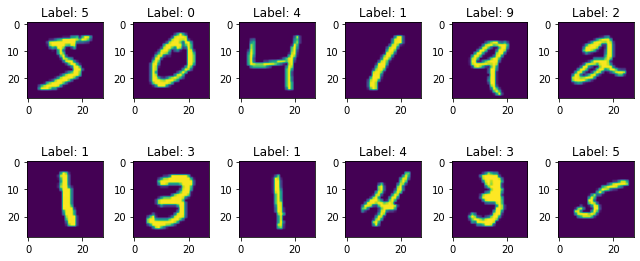

In [ ]:
# Ploting Normal Table [2x6], without Augmentation
normal_table(2, 6)

### With Augmentation in Dataset

In [ ]:
%matplotlib inline

def augmented_table(row, col, data):
  # define number of images to show
  num_row = row
  num_col = col
  num = num_row * num_col

  # get images
  images = x_train[0:num]
  labels = y_train[0:num] 

  # plot images
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))

  for X, Y in data.flow(x_train.reshape(x_train.shape[0], 28, 28, 1), y_train.reshape(y_train.shape[0], 1), batch_size=num, shuffle=False):
      for i in range(0, num):
            ax = axes[i//num_col, i%num_col]
            ax.imshow(np.asarray(X[i].reshape(28, 28)).squeeze())
            ax.set_title(f'Label: {int(Y[i])}')
      break

  plt.tight_layout()
  plt.show()

## Rotation Augmentation

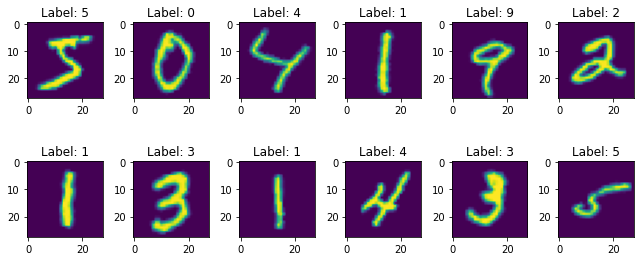

In [ ]:
rot = 30

datagenRot = ImageDataGenerator(rotation_range=rot)
datagenRot.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))

# Ploting Augmented Table [2x6]
augmented_table(2, 6, datagenRot)

## Shift Augmentation

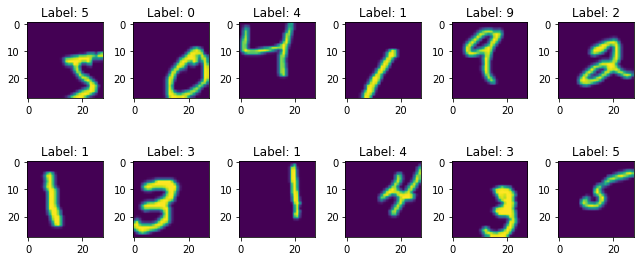

In [ ]:
shift = (0.25, 0.25)

datagenShift = ImageDataGenerator(width_shift_range=shift[0], height_shift_range=shift[1])
datagenShift.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))

augmented_table(2, 6, datagenShift)

## Shear Augmentation

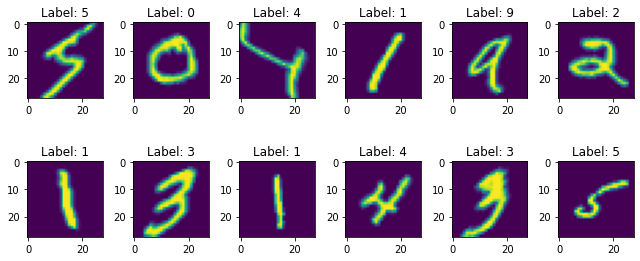

In [ ]:
shear = 45

datagenShear = ImageDataGenerator(shear_range=shear)
datagenShear.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))

augmented_table(2, 6, datagenShear)

## Zoom Augmentation

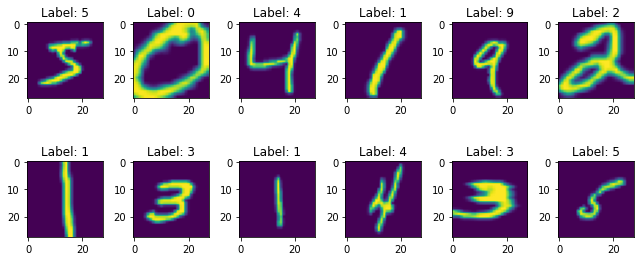

In [ ]:
zoom = [0.5, 1.5]

datagenZoom = ImageDataGenerator(zoom_range=zoom)
datagenZoom.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))

augmented_table(2, 6, datagenZoom)

In [ ]:
x_train, x_test = x_train.astype("float32")/255, x_test.astype("float32")/255
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
# Com Camada Convolucional

model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)), # Input
     
        Conv2D(32, 3, padding='same', activation="relu"),
        Conv2D(32, 3, padding='same', activation="relu"),
        Conv2D(32, 3, padding='same', activation="relu"),
        MaxPooling2D((2,2), (2,2)),
     
        Conv2D(64, 3, padding='same', activation="relu"),
        Conv2D(64, 3, padding='same', activation="relu"),
        Conv2D(64, 3, padding='same', activation="relu"),
        MaxPooling2D((2,2), (2,2)),
     
        Conv2D(128, 3, padding='same', activation="relu"),
        Conv2D(128, 3, padding='same', activation="relu"),
        Conv2D(128, 3, padding='same', activation="relu"),
        MaxPooling2D((2,2), (2,2)),

        Flatten(),
        Dropout(0.2),
     
        Dense(64, activation='relu'),
     
        Dense(10, activation="softmax"), # Output
    ]
)

model.summary()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

In [ ]:
# Data Generator for Augmentation
rot = 10
shift = (0.1, 0.1)
shear = 0.05
zoom = 0.1

datagenAug = ImageDataGenerator(rotation_range=rot, width_shift_range=shift[0], height_shift_range=shift[1], shear_range=shear, zoom_range=zoom)
datagenAug.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))


# Callback call
batch_size = 100
epochs = 30

es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
hist = model.fit_generator(datagenAug.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), callbacks=[es])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/30
600/600 [==============================] - 598s 995ms/step - loss: 0.2693 - accuracy: 0.9116 - val_loss: 0.0377 - val_accuracy: 0.9869
Epoch 2/30
600/600 [==============================] - 602s 1s/step - loss: 0.0673 - accuracy: 0.9802 - val_loss: 0.0249 - val_accuracy: 0.9912
Epoch 3/30
600/600 [==============================] - 597s 994ms/step - loss: 0.0516 - accuracy: 0.9850 - val_loss: 0.0307 - val_accuracy: 0.9908
Epoch 4/30
600/600 [==============================] - 604s 1s/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.0267 - val_accuracy: 0.9927
Epoch 5/30
600/600 [==============================] - 598s 996ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0316 - val_accuracy: 0.9885


In [ ]:
# model.save("./model_CNN_G1")

In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(y=hist.history['loss'],mode='lines', name='Training'))
fig.add_trace(go.Scatter(y=hist.history['val_loss'],mode='lines', name='Validation'))

fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 23s 74ms/step - loss: 0.0249 - accuracy: 0.9912
Test loss: 0.024889016523957253
Test accuracy: 0.9911999702453613


# Configuração

In [ ]:
# Grupos
grupos = ['criado_por_G1', 'criado_por_G2', 'criado_por_3', 'criado_por_G4', 'criado_por_G5', 'criado_por_G6, criado_por_Tiago']
seu_grupo = 'criado_por_G1' # substitua o x pelo número do seu grupo

In [2]:
from pathlib import Path

url = 'https://drive.google.com/drive/folders/1JyZs0ePK3PnAiCtF1JrGVzxfp3vf97MN?usp=sharing'

import gdown
gdown.download_folder(url, quiet=True, remaining_ok = True)

['/content/digitos_para_teste/_2_2.png',
 '/content/digitos_para_teste/0_0.png',
 '/content/digitos_para_teste/0_1.png',
 '/content/digitos_para_teste/0_3.png',
 '/content/digitos_para_teste/0_4.png',
 '/content/digitos_para_teste/0_5.png',
 '/content/digitos_para_teste/0_6.png',
 '/content/digitos_para_teste/0_7.png',
 '/content/digitos_para_teste/0_8.png',
 '/content/digitos_para_teste/0_9.png',
 '/content/digitos_para_teste/1_0.png',
 '/content/digitos_para_teste/1_1.png',
 '/content/digitos_para_teste/1_2.png',
 '/content/digitos_para_teste/1_3.png',
 '/content/digitos_para_teste/1_4.png',
 '/content/digitos_para_teste/1_5.png',
 '/content/digitos_para_teste/1_6.png',
 '/content/digitos_para_teste/1_7.png',
 '/content/digitos_para_teste/1_8.png',
 '/content/digitos_para_teste/1_9.png',
 '/content/digitos_para_teste/1.png',
 '/content/digitos_para_teste/2_1.png',
 '/content/digitos_para_teste/2_2.png',
 '/content/digitos_para_teste/2_3.png',
 '/content/digitos_para_teste/2_4.png',
 

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

raiz_desafio = Path('/content/digitos_para_teste')

dict_desafios_geral = []

for arq in raiz_desafio.iterdir():
  digito = str(arq).split('.')[0][-1]
  dict_desafios = {}
  dict_desafios['true'] = int(digito)
  dict_desafios['file'] = arq
  
  im = cv.imread(str(arq.resolve()))
  b,g,r = cv.split(im)
  p = np.array(b).astype('float32')

  dict_desafios['imagem'] = p / 255
  dict_desafios['predito'] = 0

  dict_desafios_geral.append(dict_desafios)

# Desempenho

In [ ]:
from pathlib import Path, PurePath
import os
import sys  
  
FILE = Path('/content/digitos_para_teste').resolve()
ROOT_PESSOAS = FILE.parents[0]  
if str(ROOT_PESSOAS) not in sys.path:
    sys.path.append(str(ROOT_PESSOAS))  # add ROOT to PATH
ROOT_PESSOAS_REL = Path(os.path.relpath(ROOT_PESSOAS, Path.cwd()))  # relative
    

In [ ]:
predicoes = []
teste = []
acertos = 0

for digito in dict_desafios_geral:
  predicao = model.predict( np.array([digito['imagem'] ]) )
  digito['predito'] = np.argmax(predicao)

  predicoes.append(digito['predito'])
  teste.append(digito['true'])

  if digito['predito'] == digito['true']:
    acertos+=1
    
percentual = acertos/len(teste)
  
print(f'Predições: {predicoes}')
print(f'\nTestes:    {teste}')
print(f'\n--------------------------')
print(f'\nQuantidade de acertos: {acertos}')
print(f'Percentual de acerto: {percentual}')

Predições: [2, 8, 9, 5, 4, 5, 1, 4, 7, 5, 8, 8, 3, 8, 2, 1, 9, 1, 1, 2, 5, 3, 4, 4, 4, 9, 6, 5, 5, 7, 5, 4, 3, 3, 8, 7, 6, 0, 5, 2, 0, 6, 7, 4, 8, 5, 5, 8, 2, 7]

Testes:    [2, 2, 9, 9, 4, 9, 1, 4, 4, 5, 8, 0, 3, 1, 3, 1, 9, 1, 1, 2, 5, 3, 6, 4, 4, 9, 6, 3, 5, 7, 3, 6, 3, 3, 8, 7, 6, 0, 5, 2, 0, 6, 7, 4, 1, 5, 5, 8, 2, 7]

--------------------------

Quantidade de acertos: 38
Percentual de acerto: 0.76


In [ ]:
model.save("/content/drive/MyDrive/Insper/6_semestre/computer_vision/Batalha_Redes/CNN_aug/modelo_cnn_aug")

In [ ]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/Insper/6_semestre/computer_vision/Batalha_Redes/CNN_aug/modelo_cnn_aug")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

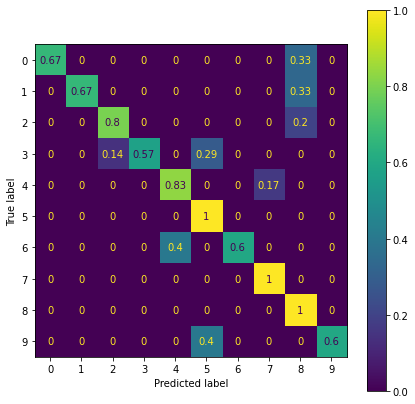

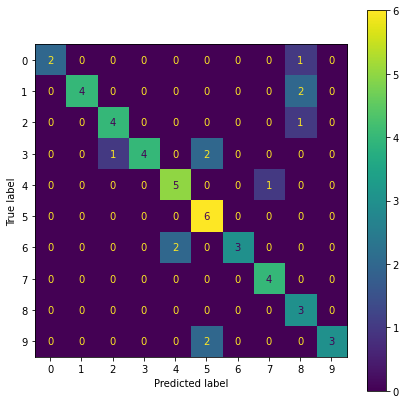

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predict_class = np.array(predicoes) > 0.1

cm = confusion_matrix(teste, predicoes, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)
plt.show()

cm = confusion_matrix(teste, predicoes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)
plt.show()